In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('Titanic.csv')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)


In [2]:
df.shape

(891, 12)

In [3]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data cleaning

There are 2 missing vakues in Embarked, 86 missing values in the Age column and 327 missing values in the Cabin column. To ensure more accurate analysis, it is essential to handle these missing values appropriately by filling them or removing them.

In [7]:
# Age

round(df['Age'].mean()) # getting the mean value of the age

df['Age'] = df['Age'].fillna(round(df['Age'].mean())) # filling the NaN values with the mean value

df['Age'] = df['Age'].astype('int')# changing the data type of Age form float to int

In [8]:
# Cabin

#df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0]) # filling the NaN values with the mode value
# we can do this but , there wont be much use of this column later for further analysis as majority of the cabins are nan, 
#so instead we can just drop this column

df.drop('Cabin', axis=1 , inplace = True)

In [9]:
# Embarked

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

There are no remaining columns with null values, so we can now proceed with the analysis.

# Feature Engineering

 ### Create a new column to get the family size of the passenger.

In [11]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # here 1 means the passenger themselves

Doing this can help us analyze if there is any relation between family size and the survival rate

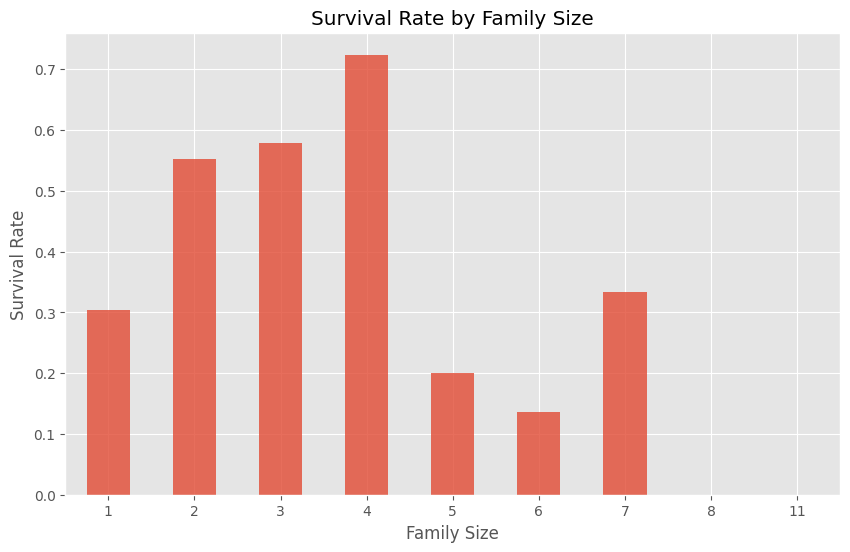

In [12]:
family_survival = df.groupby('FamilySize')['Survived'].mean()

# Bar plot
family_survival.plot(kind='bar', figsize=(10, 6), alpha = 0.8)
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation= 0)
plt.title('Survival Rate by Family Size')
plt.show()

Passengers with family sizes of 2 to 4 had a higher chance of survival, while larger families (5 or more members) faced significantly lower survival rates. This trend suggests that smaller family groups may have been easier to manage during evacuation, resulting in better survival outcomes.

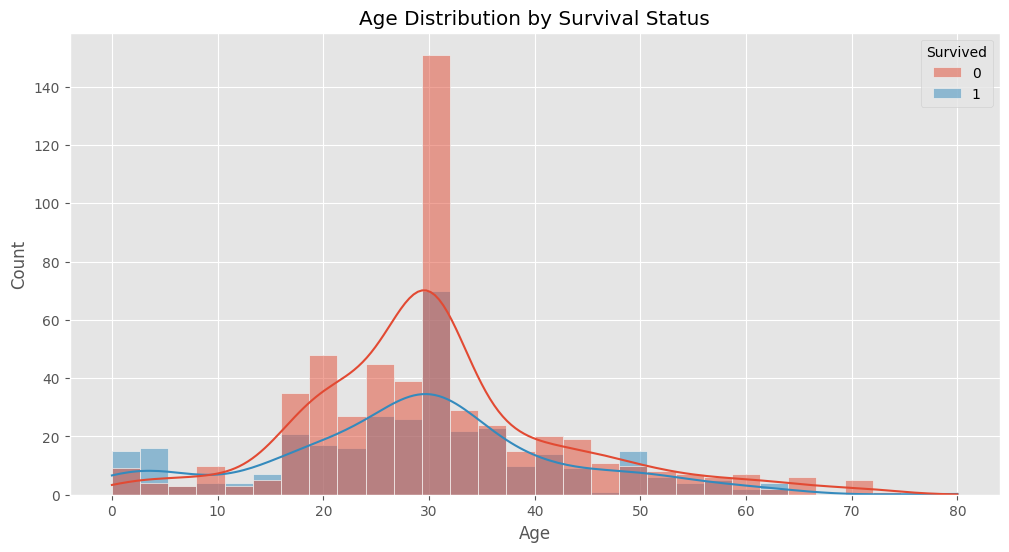

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(data= df ,x ='Age', hue = 'Survived',kde= True, alpha=0.5)
plt.title('Age Distribution by Survival Status')
plt.show()

This histogram visualizes the distribution of ages for individuals categorized by survival status. The red bars and line represent the non-survivors (Survived = 0), while the blue bars and line represent the survivors (Survived = 1). The kernel density estimate (KDE) overlays provide a smoother representation of the age distribution for each survival category. Non-survivors tend to cluster around young adults (20–40 years), while survivors show a slightly broader distribution.

### Categorize age groups (child, teens, adults, seniors).

In [14]:
# using loops to iterate over all the rows and assign appropriate categorical age gropus.
df['AgeGroup'] = ''
for index , rows in df.iterrows():
    if rows['Age'] <= 12:
        df.at[index,'AgeGroup'] = 'Child'
    elif (rows['Age'] >12) & (rows['Age'] <= 19):
        df.at[index,'AgeGroup'] = 'Teen'
    elif (rows['Age'] >19) & (rows['Age'] <= 59):
        df.at[index,'AgeGroup'] = 'Adult'
    else:
        df.at[index,'AgeGroup'] = 'Senior'
        
df.insert(6, 'AgeGroup', df.pop('AgeGroup')) # poping the new column at the 6th index
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,AgeGroup,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
390,391,1,1,"Carter, Mr. William Ernest",male,36,Adult,1,2,113760,120.0,S,4


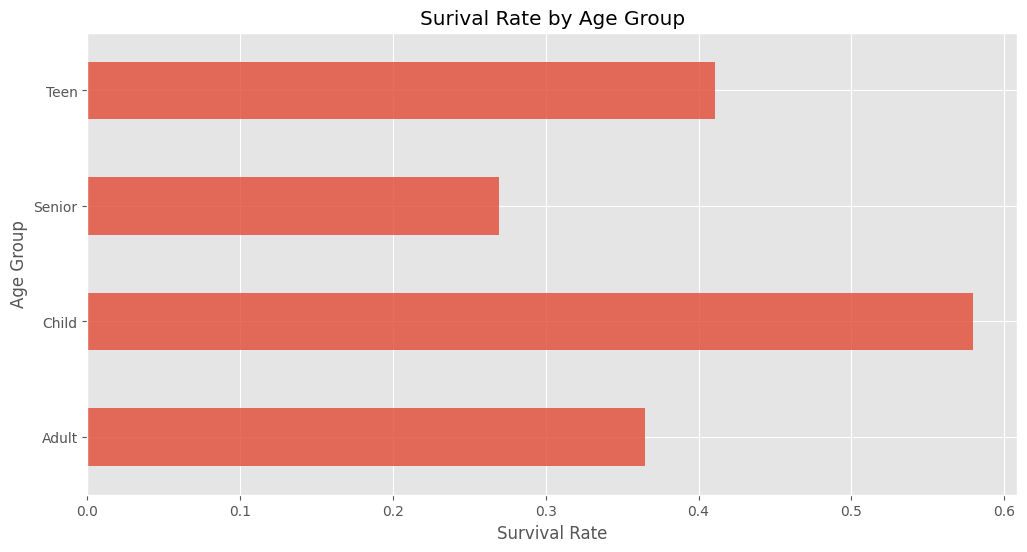

In [15]:
Age_survived = df.groupby('AgeGroup')['Survived'].mean()
Age_survived.plot(kind= 'barh', figsize=(12,6), alpha =0.8)
plt.title('Surival Rate by Age Group')
plt.xlabel('Survival Rate')
plt.ylabel('Age Group')
plt.show()

From this analysis, we can conclude that the Children age groups were prioritized the most, followed by the Teen age group and the Adult age group and lastly the senior age group.

## Creating a new column based on the passengers title

In [16]:
df['Title'] = df['Name'].str.split(",").str.get(1) #Getting the Title of each passangers

In [17]:
df['Title'] = df['Title'].str.split(".").str.get(0)

In [18]:
# Clean and standardize titles in the DataFrame
df['Title'] = df['Title'].str.strip()  # Remove leading/trailing spaces
df['Title'] = df['Title'].str.capitalize()  # Standardize capitalization

# Updated mapping with corrected keys
t = {
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Noble',
    'The countess': 'Noble',  # Fixed capitalization
    'Sir': 'Noble',
    'Don': 'Noble',
    'Jonkheer': 'Noble',
    'Col': 'Military',
    'Major': 'Military',
    'Capt': 'Military'
}

# Now mapping the titles 
df['Title'] = df['Title'].map(t).fillna(df['Title'])


In [19]:
df['Title'].value_counts()

Title
Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Noble         5
Military      5
Name: count, dtype: int64

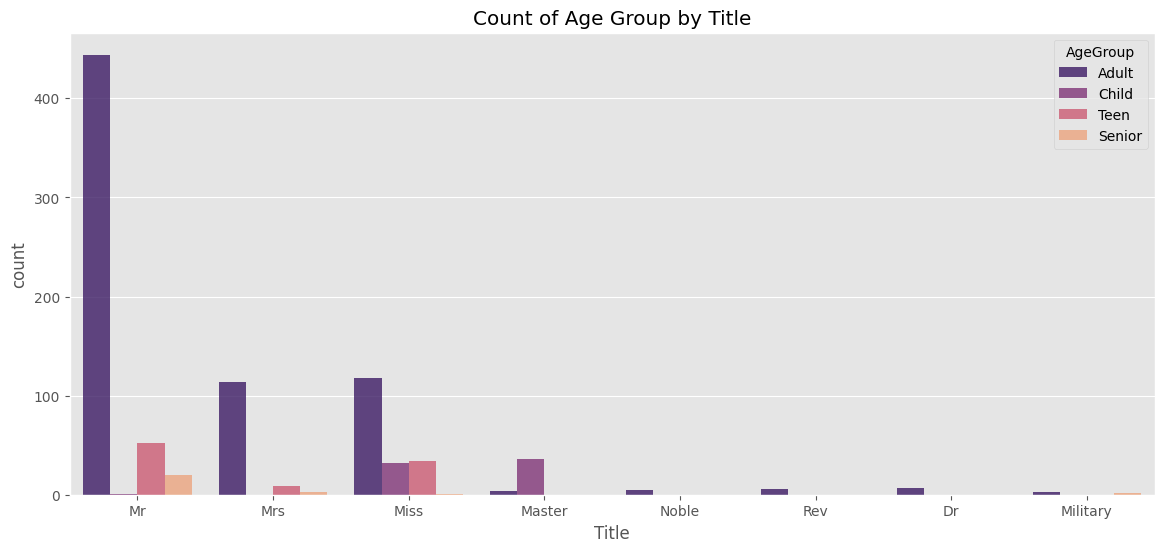

In [20]:
plt.figure(figsize=(14,6))
sns.countplot(data = df , x= 'Title', alpha=0.8, hue= 'AgeGroup', palette='magma')
plt.xticks(rotation = 0)
plt.title('Count of Age Group by Title')
plt.show()

The plot shows that most passengers were titled "Mr," followed by "Miss" and "Mrs," with adults dominating across all titles, while "Master" was common for children and rare titles like "Noble" and "Military" had minimal representation.

# Exploratory Data analysis (EDA)

### Survival Rate

In [21]:
survive = {
    0: 'Did not Survive',
    1: 'Survived'
}
df['SurvivedLabel'] = df['Survived'].map(survive)
df.insert(2, 'SurvivedLabel' ,df.pop('SurvivedLabel'))
df.sample()

,PassengerId,Survived,SurvivedLabel,Pclass,Name,Sex,Age,AgeGroup,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
378,379,0,Did not Survive,3,"Betros, Mr. Tannous",male,20,Adult,0,0,2648,4.0125,C,1,Mr


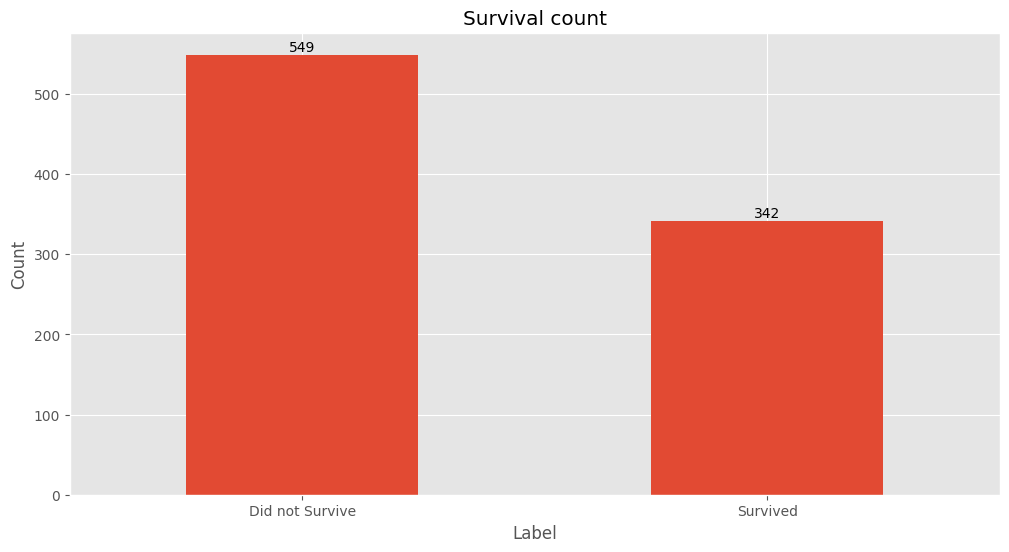

In [22]:
plt.figure(figsize=(12,6))
ax = df['SurvivedLabel'].value_counts().plot(kind = 'bar')
plt.title('Survival count')
plt.xticks(rotation = 0)
plt.xlabel('Label')
plt.ylabel('Count')

# showing the count of survived and not survived passengers.
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
    
plt.show()

### Survival Rate by Sex

In [23]:
df['Sex'].value_counts().reset_index()

,Sex,count
0,male,577
1,female,314


We can see that there were a total of 577 male population and 314 of female population. Now let us take a look at how many of them survived?

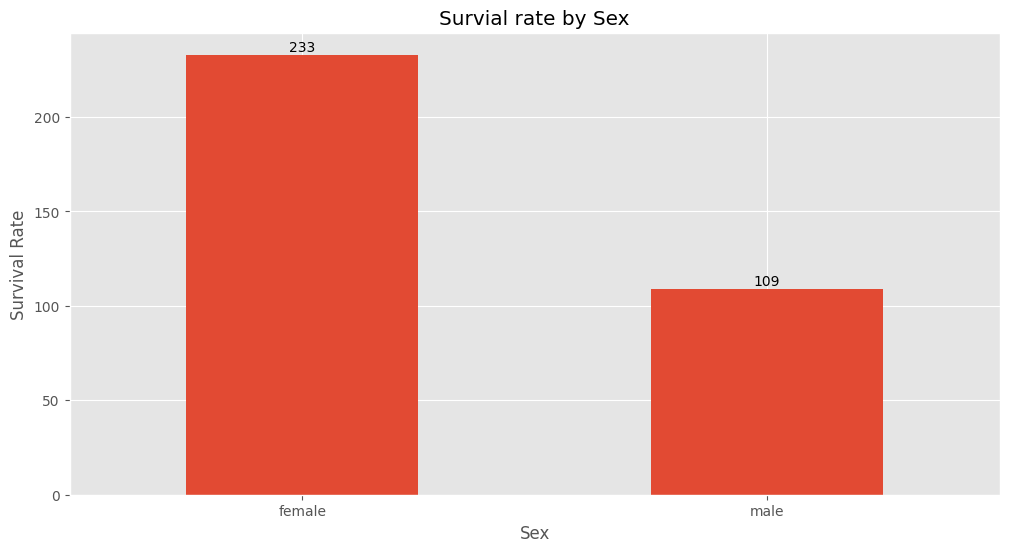

In [24]:
sex_survived = df.groupby(['Sex'])['Survived'].sum()
ax = sex_survived.plot(kind ='bar', figsize=(12,6))
plt.title('Survial rate by Sex')

plt.xlabel('Sex')
plt.xticks(rotation = 0)
plt.ylabel('Survival Rate')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()

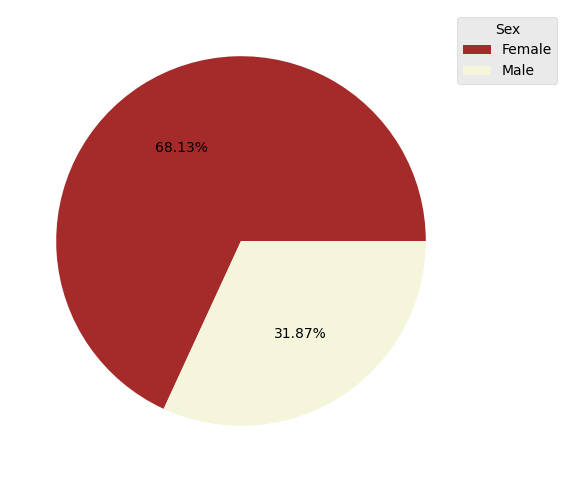

In [25]:
gender= ['Female','Male']
plt.figure(figsize=(12,6))
sex_survived.plot(kind = 'pie', labels=None ,autopct ='%1.2f%%',colors = ['brown','beige'] )
plt.legend(labels= gender,loc='upper right', bbox_to_anchor=(1,0,0.2,1), title = 'Sex',)
plt.ylabel(None)
plt.show()

As seen in the bar plot and pie chart the males survivirs are comparitively less than the females. Specifically, 68.13% of the people who survived were females, while the remaining 31.87% were males. This suggests that the females were given more priority than the males

### Survival Rate based on title

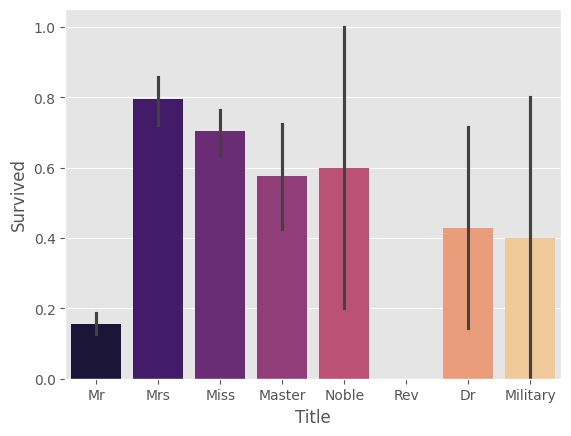

In [26]:
sns.barplot(data=df , x= 'Title', y='Survived' , palette = 'magma')
plt.show()

This bar plot shows survival rates by title, likely from Titanic data. Women, especially those titled "Mrs" and "Miss," had the highest survival rates, while "Mr" had the lowest, highlighting gender disparities. Titles like "Master" and "Noble" had moderate survival rates, possibly reflecting social status advantages. Wide error bars for "Rev," "Dr," and "Military" suggest smaller sample sizes or variability. Gender and societal roles strongly influenced survival.

### Survival Rate by passenger class

In [27]:
s_p = pd.crosstab(df['Pclass'],df['Survived'])
s_p

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Figure size 1200x600 with 0 Axes>

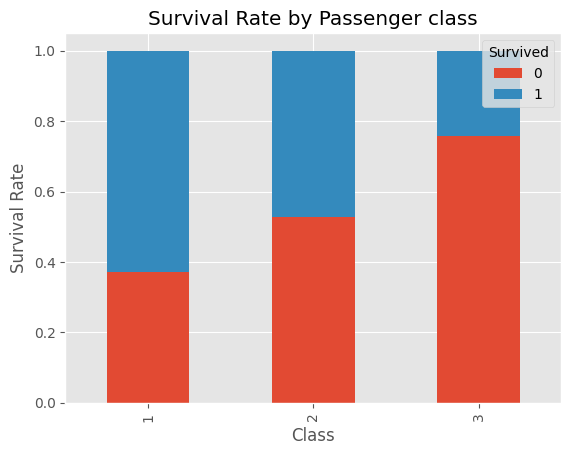

In [28]:
s_p_xt = s_p.div(s_p.sum(1).astype(float), axis = 0)
plt.figure(figsize=(12,6))
s_p_xt.plot(kind = 'bar',stacked = True, title = 'Survival Rate by Passenger class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

### Survival Rate by ticket class and sex

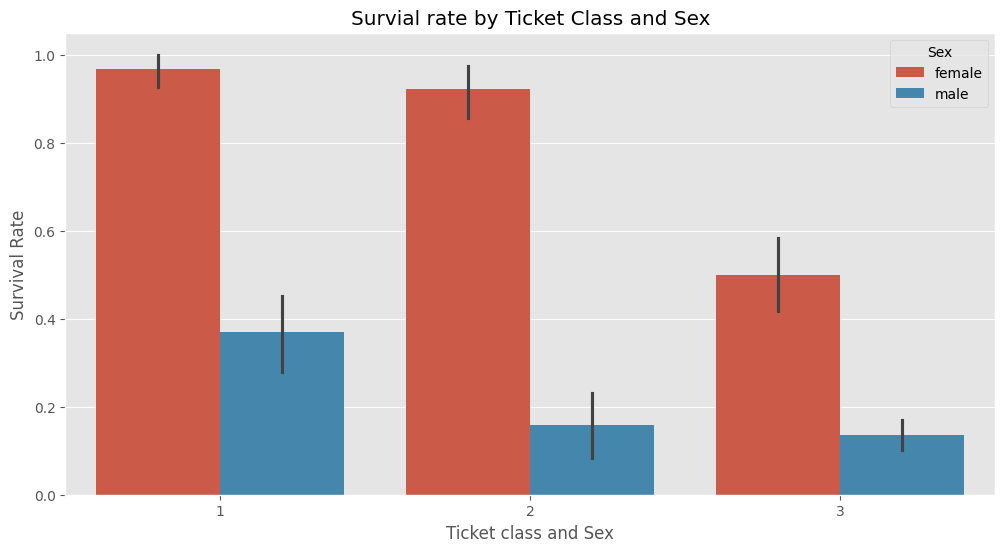

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(df , x='Pclass', y='Survived',hue = 'Sex')
plt.title('Survial rate by Ticket Class and Sex')
plt.xlabel('Ticket class and Sex')
plt.xticks(rotation = 0)
plt.ylabel('Survival Rate')
plt.show()

From this bar plot, it is evident that 1st class ticket holders had a significantly higher survival rate compared to 2nd and 3rd class ticket holders, indicating that passengers in higher classes were given greater priority during evacuation. Additionally, the survival rate of females was consistently higher across all ticket classes, suggesting that sex played a crucial role in survival, regardless of class. This highlights the impact of class and gender in determining survival chances during the Titanic disaster.

## Distribution of age

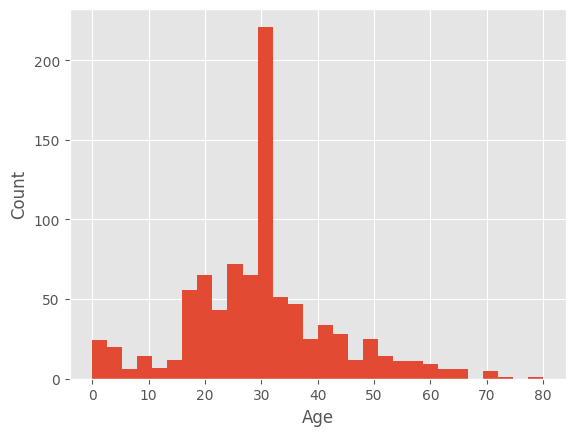

In [30]:
plt.hist(df['Age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [31]:
df['Age'].value_counts().reset_index().head(5)

,Age,count
0,30,204
1,24,31
2,22,27
3,28,27
4,18,26


This histogram suggests that the majority of the population was between the ages of 20 and 30, with the highest count observed at age 30.

## Fare Distribution

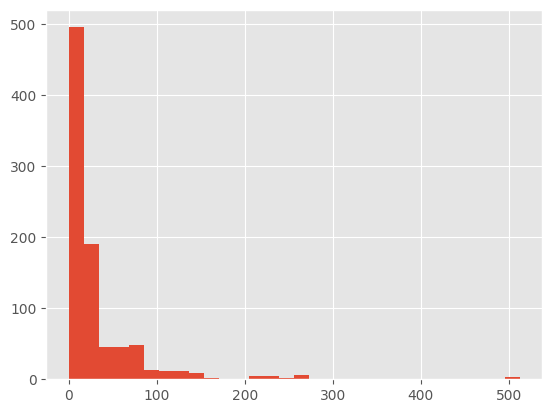

In [32]:
plt.hist(df['Fare'], bins=30)
plt.show()

As we can see in the above histogram, majority of the fare distribution falls with in the 0-40 range, we cannot conclude anything from this as it is not very clear whether the fare was actally 0 or not. So we can further disect the histogram from 0-40 for more precise interpretation.

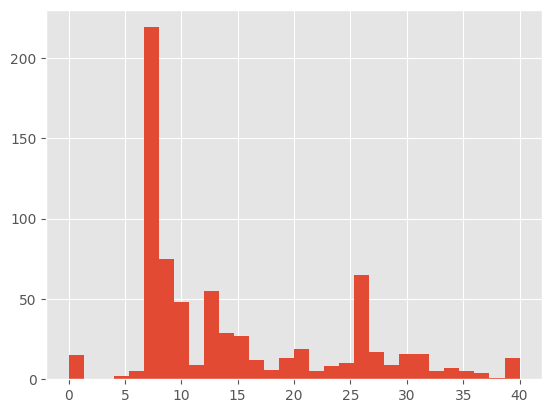

In [33]:
# disecting the histogram to a range of 0 to 40

plt.hist(df['Fare'], bins=30, range=[0, 40])
plt.show()

Now we can see that the majority of the fare distribution ranged from 5 to 10 dollars with some passengers boarding the ship without paying any fare at all.

### Age vs. Fare (Scatter Plot)

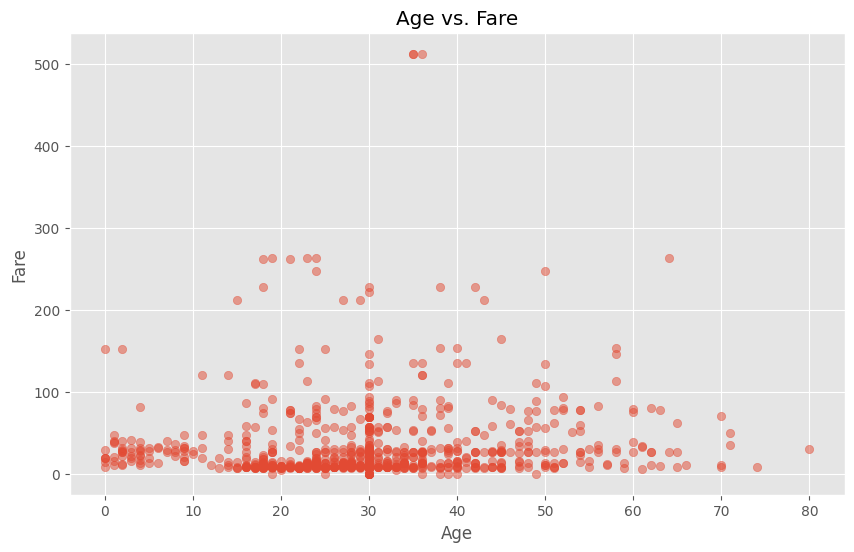

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'],df['Fare'],alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()

According to the scatter plot, there is no significat relationship between Age and Fare amounts.

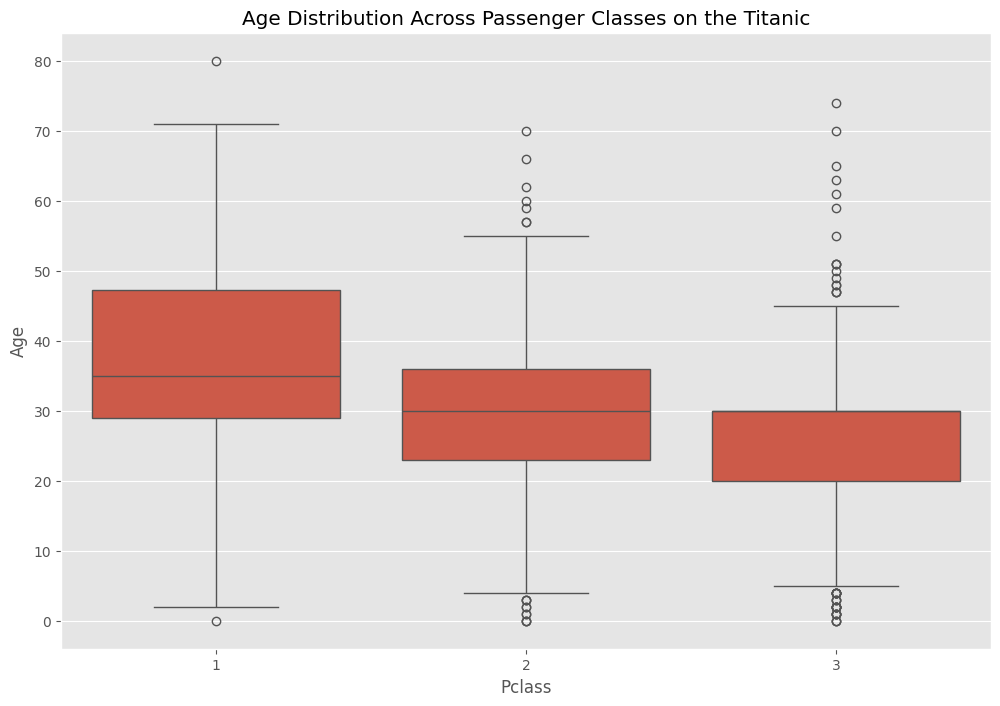

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Pclass', y = 'Age', data = df)
plt.title('Age Distribution Across Passenger Classes on the Titanic')
plt.show()

This boxplot shows that first-class passengers were generally older, with a higher median age and less variability, while third-class passengers were the youngest and most diverse in age. Second-class passengers had a median age between the two. Outliers, particularly in the second and third classes, indicate some unusually young and old passengers.

### Encoding categorical variables

In [37]:
df.dtypes

PassengerId        int64
Survived           int64
SurvivedLabel     object
Pclass             int64
Name              object
Sex               object
Age                int64
AgeGroup          object
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Embarked          object
FamilySize         int64
Title             object
dtype: object

In [38]:
# encoding for Embarked
code1 = {
    'S' : 0,
    'C' : 1, 
    'Q' : 2
}
df['Embarked'] = df['Embarked'].map(code1)

# encoding for Sex
code2 = {
    'male': 0,
    'female':1
}
df['Sex'] = df['Sex'].map(code2)

# encoding for Title
code3 ={
    'Mr': 0,
    'Miss':1,
    'Mrs':2,         
    'Master':3,
    'Dr':4,    
    'Rev':5,    
    'Noble':6,        
    'Military':7  
}
df['Title'] = df['Title'].map(code3)

In [39]:
df.sample()

,PassengerId,Survived,SurvivedLabel,Pclass,Name,Sex,Age,AgeGroup,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
443,444,1,Survived,2,"Reynaldo, Ms. Encarnacion",1,28,Adult,0,0,230434,13.0,0,1,1


### Dropping unnecessary columns

In [40]:
df.drop(['PassengerId','SurvivedLabel','Name','AgeGroup','Ticket'], axis = 1 ,inplace = True)

In [41]:
df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
60,0,3,0,22,0,0,7.2292,1,1,0


# Building a Logistic Regression model

In [42]:
# First we need to import train_test_split model 

from sklearn.model_selection import train_test_split

In [43]:
# Features (X) and Target (y)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','FamilySize','Title']] # Independent variables
y = df['Survived'] # Dependent variable


In [44]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8 ,random_state=43)

# Train a Logestic Model

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()

In [47]:
model.fit(X_train,y_train)

LogisticRegression()

# Make predictions

In [48]:
y_pred = model.predict(X_test)
y_pred


array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1])

# Evaluating the model

In [49]:
from sklearn.metrics import confusion_matrix

A confusion matrix is a tool used in machine learning to evaluate the performance of a classification model. It compares the predicted labels from the model with the actual labels in the dataset.

In [50]:
# Confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[94 16]
 [29 40]]


Out of total 179 passangers

True Negatives (94): Passengers correctly predicted as not surviving.

True Positives (40): Passengers correctly predicted as surviving.

False Positives (16): Passengers predicted to survive but did not.

False Negatives (29): Passengers predicted not to survive but actually did.

This indicates that the model performs better at identifying Class 0 instances compared to Class 1, as seen from the higher count of true negatives relative to false negatives. 

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy*100,2)}%")

Accuracy: 74.86%


 The accuracy of 74.86% means the model correctly predicted survival outcomes for 74.86% of the test data. While this indicates good performance, it doesn’t guarantee the same accuracy for new passengers, although similar results can be expected if the new data aligns with the test data's patterns.

## Making predictions on your own

In [53]:
new_passenger = [[3, 0, 23, 1, 0, 7.25, 2, 2, 4]]  # Pclass=3, Sex=Male, Age=23, SibSp=1, Parch=0, Fare=7.25, Embarked=S , FamilySize=2, Title= Male(0)

# Predict survival
prediction = model.predict(new_passenger)
print("Survived the Titanic Disaster" if prediction[0] == 1 else "Did not survive the Titanic Disaster")


Did not survive the Titanic Disaster
